In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Load the dataset
data1 = pd.read_csv("data1.csv")

In [3]:
def dentify(data):
    # Identify non-numeric columns
    non_numeric_columns = data.select_dtypes(include=['object']).columns

    # Use LabelEncoder to convert non-numeric columns to numeric
    label_encoder = LabelEncoder()
    for column in non_numeric_columns:
        data[column] = label_encoder.fit_transform(data[column])
    return data     

In [4]:
data1=dentify(data1)

In [5]:
# Split data into features and labels
X = data1.drop("fraud_decision", axis=1)
y = data1["fraud_decision"]


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a random forest classifier
oracle0 = RandomForestClassifier(n_estimators=100, random_state=42)
oracle0.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Make predictions
y_pred = oracle0.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
if accuracy > 0.90:
    print("Oracle O has accuracy greater than 0.90.")


Oracle O has accuracy greater than 0.90.


2

In [9]:
import random

def simulate_sampling_and_labeling(oracle, data_file):
    data = pd.read_csv(data_file)
    data = dentify(data)
    
    #Randomly sampling a data point
    random_index = random.randint(0, len(data) - 1)
    random_data_point = data.iloc[random_index, :-1]  # 排除目标列

    #Requesting Oracle to label it
    predicted_label = oracle.predict([random_data_point])[0]

    return predicted_label


label = simulate_sampling_and_labeling(oracle0, 'data2.csv')
print("Predicted labels:", label)

Predicted labels: False


E:\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
from scipy.stats import binom

#Accuracy
accuracy = 0.95

#Number of target positive labels
target_positive_labels = 100

# #Calculate the required number of samples
n = 1
probability = 0
while probability <= 0.95:
    probability = 1 - binom.cdf(target_positive_labels - 1, n, accuracy)
    n += 1

print("At least the number of samples is required:", n - 1)



At least the number of samples is required: 109


4

In [11]:
#Read data3. CSV data
data3 = pd.read_csv('data3.csv')
data3 =dentify(data3)


#Extracting features from data3. CSV
X_data3 = data3.drop(columns=['fraud_decision'])

#Prediction label
y_pred_data3 = oracle0.predict(X_data3)

#Actual label
y_true_data3 = data3['fraud_decision']

#Calculate accuracy, recall rate, and F1 score
accuracy = accuracy_score(y_true_data3, y_pred_data3)
recall = recall_score(y_true_data3, y_pred_data3)
f1 = f1_score(y_true_data3, y_pred_data3)

print("Accuracy:", accuracy)
print("recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9115
recall: 0.376865671641791
F1 Score: 0.5329815303430079


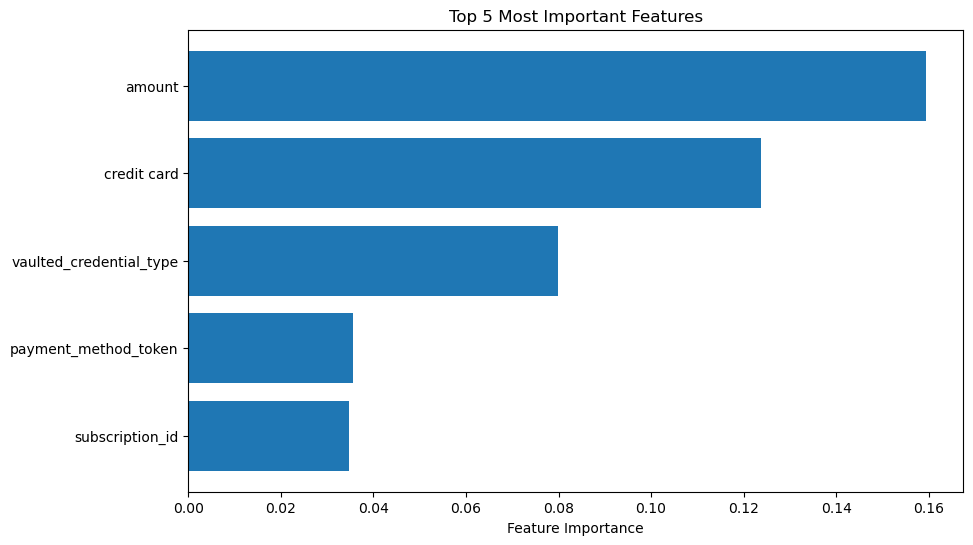

In [12]:
import matplotlib.pyplot as plt

# 获取特征重要性
feature_importance = oracle0.feature_importances_

#Obtain feature names
feature_names = X.columns


feature_importance_dict = dict(zip(feature_names, feature_importance))


sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

#Take the top 5 most important features
top_features = sorted_feature_importance[:5]

#Separate feature names and importance values
top_feature_names, top_feature_importance = zip(*top_features)

#Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel("Feature Importance")
plt.title("Top 5 Most Important Features")
plt.gca().invert_yaxis()  
plt.show()
